* Load Dataset

In [1]:
import opendatasets as od
data = od.download("https://www.kaggle.com/competitions/neurips-open-polymer-prediction-2025/data")

Skipping, found downloaded files in ".\neurips-open-polymer-prediction-2025" (use force=True to force download)


* Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit import RDLogger


In [2]:
train = pd.read_csv('neurips-open-polymer-prediction-2025/train.csv')
test = pd.read_csv('neurips-open-polymer-prediction-2025/test.csv')
train

,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7968,2146592435,*Oc1cc(CCCCCCCC)cc(OC(=O)c2cccc(C(*)=O)c2)c1,NaN,0.367498,NaN,NaN,NaN
7969,2146810552,*C(=O)OCCN(CCOC(=O)c1ccc2c(c1)C(=O)N(c1cccc(N3...,NaN,0.353280,NaN,NaN,NaN
7970,2147191531,*c1cc(C(=O)NCCCCCCCC)cc(N2C(=O)c3ccc(-c4ccc5c(...,NaN,0.369411,NaN,NaN,NaN
7971,2147435020,*C=C(*)c1ccccc1C,261.662355,NaN,NaN,NaN,NaN


In [3]:
train['SMILES'][0]

'*CC(*)c1ccccc1C(=O)OCCCCCC'

* Exploring datasets

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       511 non-null    float64
 3   FFV      7030 non-null   float64
 4   Tc       737 non-null    float64
 5   Density  613 non-null    float64
 6   Rg       614 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB


In [6]:
train.isnull().sum()

id            0
SMILES        0
Tg         7462
FFV         943
Tc         7236
Density    7360
Rg         7359
dtype: int64

In [7]:
train['Tg']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
7968           NaN
7969           NaN
7970           NaN
7971    261.662355
7972           NaN
Name: Tg, Length: 7973, dtype: float64

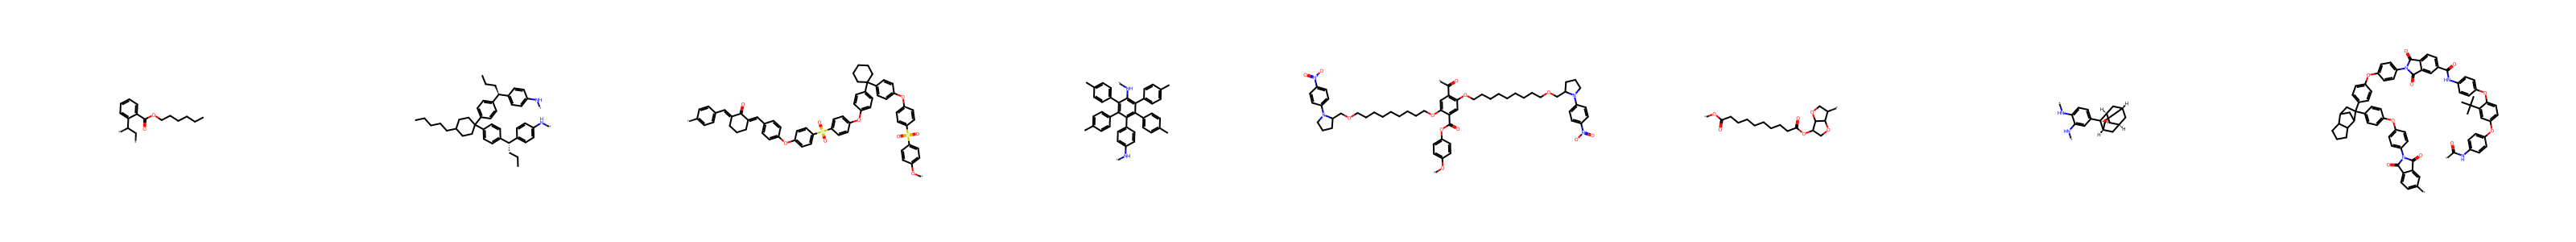

In [10]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in train['SMILES'][0:8]], molsPerRow=8, subImgSize=(400,300))

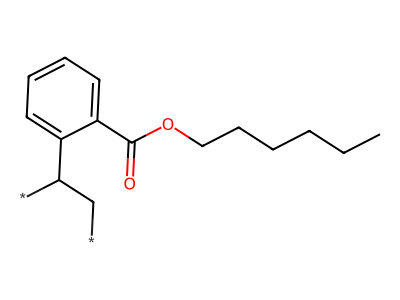

In [11]:
mol = Chem.MolFromSmiles(train['SMILES'][0])
img = Draw.MolsToImage([mol] , subImgSize=(400, 300))
img

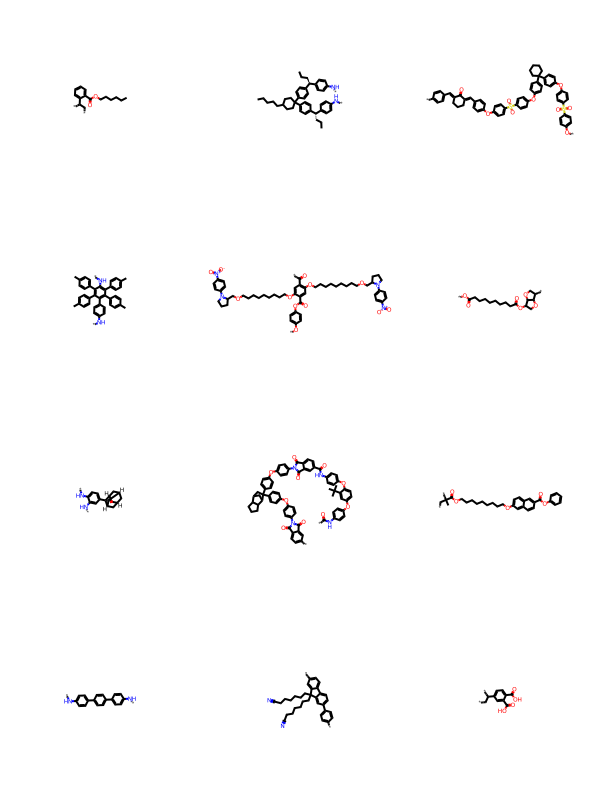

In [12]:
###Visualize some of the original data
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in train['SMILES'][0:12]], molsPerRow=3, subImgSize=(200,200))

* Cleaning Data

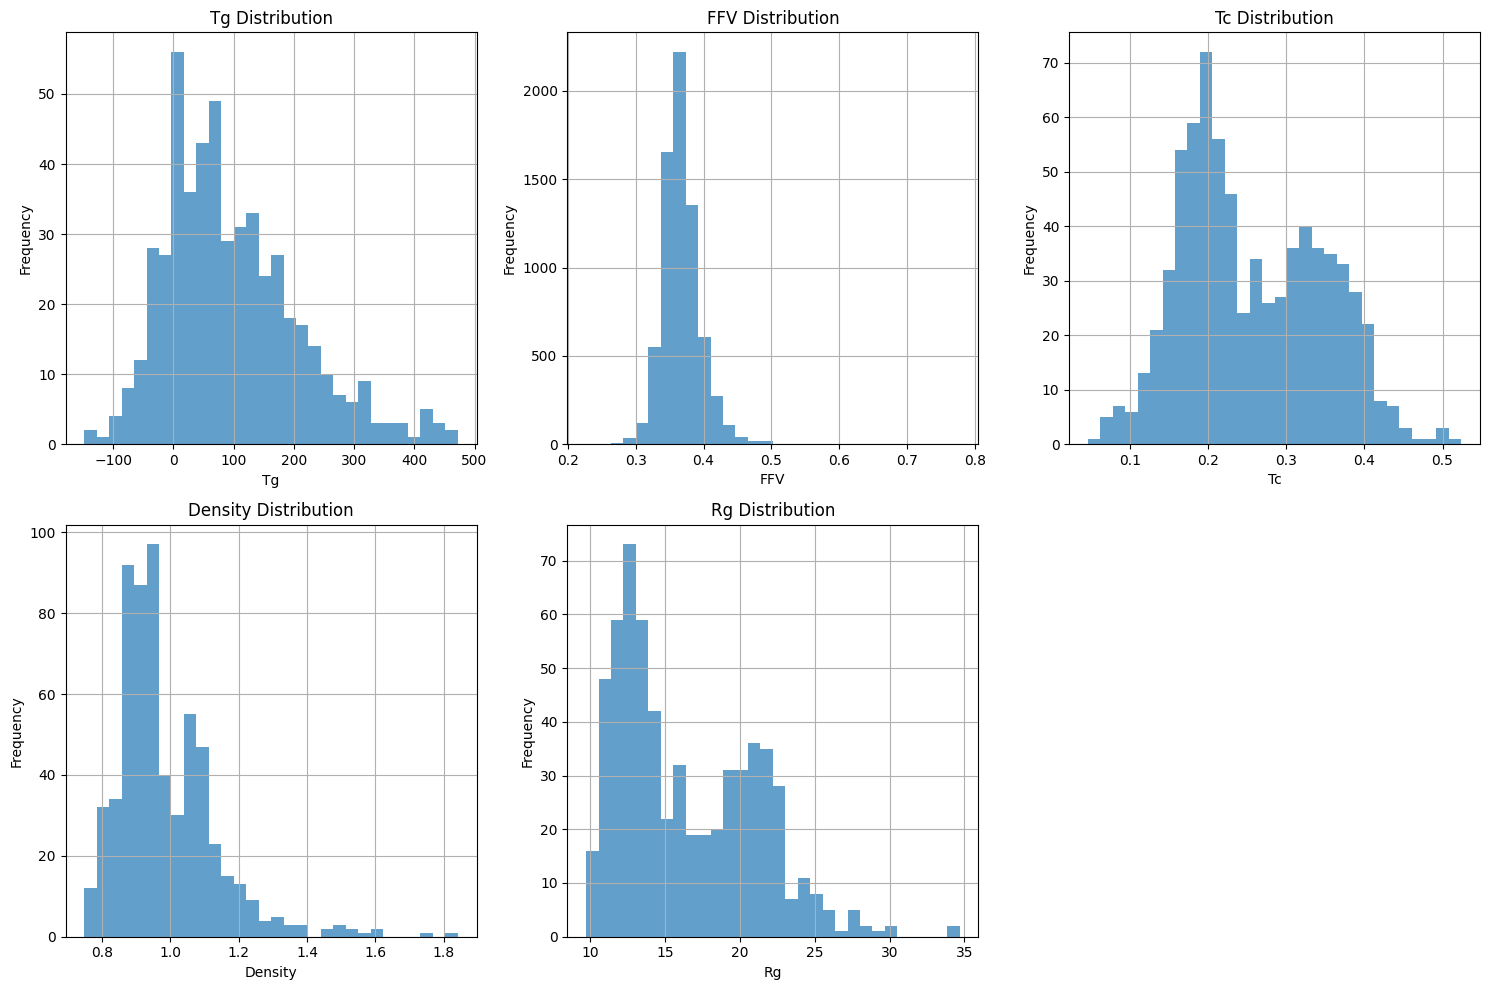

In [4]:
properties = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, prop in enumerate(properties):
    if i < len(axes):
        train[prop].hist(ax=axes[i], bins=30, alpha=0.7)
        axes[i].set_title(f'{prop} Distribution')
        axes[i].set_xlabel(prop)
        axes[i].set_ylabel('Frequency')

# Remove the last empty subplot
if len(properties) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [5]:
def prepare_data_for_modeling(df, target_properties=['Tg', 'FFV', 'Tc', 'Density', 'Rg']):
    """Prepare data for different modeling approaches"""
    
    mask = df[target_properties].notna().any(axis=1)
    df_clean = df[mask].copy()
    
    print(f"Cleaned dataset shape: {df_clean.shape}")
    print(f"Original dataset shape: {df.shape}")

    smiles = df_clean['SMILES'].tolist()
    targets = df_clean[target_properties].values
    
    return smiles, targets, df_clean

smiles_list, target_values, clean_df = prepare_data_for_modeling(train)

print(f"Number of SMILES: {len(smiles_list)}")
print(f"Target shape: {target_values.shape}")

print("\nMissing values in targets:")
for i, prop in enumerate(['Tg', 'FFV', 'Tc', 'Density', 'Rg']):
    missing = np.isnan(target_values[:, i]).sum()
    print(f"{prop}: {missing}/{len(target_values)} ({missing/len(target_values)*100:.1f}%)")

Cleaned dataset shape: (7973, 7)
Original dataset shape: (7973, 7)
Number of SMILES: 7973
Target shape: (7973, 5)

Missing values in targets:
Tg: 7462/7973 (93.6%)
FFV: 943/7973 (11.8%)
Tc: 7236/7973 (90.8%)
Density: 7360/7973 (92.3%)
Rg: 7359/7973 (92.3%)


* Loading Model ChemBERT

In [ ]:
from transformers import AutoModelForMaskedLM, AutoTokenizer, pipeline

tokenizer = AutoTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")
model = AutoModelForMaskedLM.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

fill_mask = pipeline("fill-mask", model=model, tokenizer=tokenizer)
result = fill_mask("CCOCC(<mask>)C")
print(result)